# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import rcParams
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Importing the dataset

11501568/11490434 [==============================] - 0s 0us/step


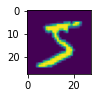

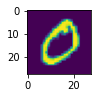

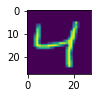

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(3):  
  plt.subplot(3, 1, i+1)
  plt.imshow(X_train[i])
  plt.show()

# Data reshaping

In [ ]:
print(f'Before reshaping:\nX_train:{X_train.shape}\nX_test:{X_test.shape}')
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(f'\nAfter reshaping:\nX_train:{X_train.shape}\nX_test:{X_test.shape}')

Before reshaping:
X_train:(60000, 28, 28)
X_test:(10000, 28, 28)

After reshaping:
X_train:(60000, 784)
X_test:(10000, 784)


# Data normalization

In [ ]:
print(f'Before normalization:\nmax value:{X_train.max()}\nmin value:{X_train.min()}')
X_train = X_train / 255.0
X_test = X_test / 255.0
print(f'After normalization:\nmax value:{X_train.max()}\nmin value:{X_train.min()}')

Before normalization:
max value:255
min value:0
After normalization:
max value:1.0
min value:0.0


# Training the classification model on the Training set

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

[[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914    0   10    4   10   32]
 [  10    2    3   34    7  783   14    6   29    4]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    8   24    5    7    1    0  950    3   29]
 [   9   11    8   23    7   25   12    7  861   11]
 [   9    8    0   11   24    6    0   19    7  925]]


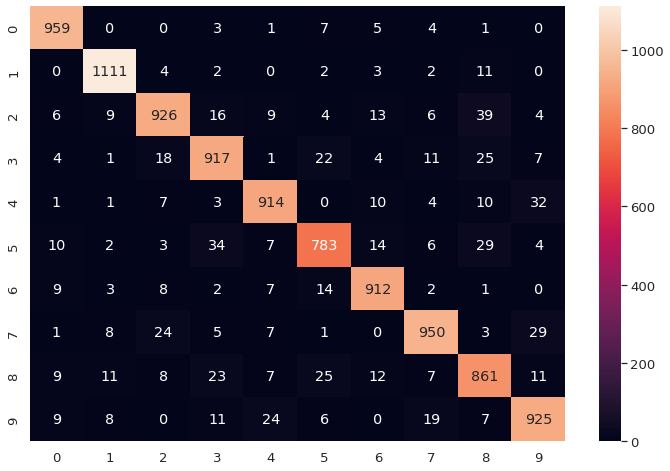

In [ ]:
classes_num = 10
cm = confusion_matrix(y_test, y_pred)
print(cm)

rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 1.2)
sns.heatmap(cm, fmt='d', annot=True, xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=np.arange(classes_num))

# Calculate Precision, Recall, F1_score and Accuracy

In [ ]:
average_methods = ['micro','macro','weighted']
for method in average_methods:
  Precision,Recall,F1_score,_ = precision_recall_fscore_support(y_test, y_pred, average=method)
  Accuracy = accuracy_score(y_test, y_pred)
  print(f'{method}:')
  print(f'Precision: {round(Precision*100,2)}%\nRecall: {round(Recall*100,2)}%\nF1_score: {round(F1_score*100,2)}%\nAccuracy: {round(Accuracy*100,2)}%\n')

micro:
Precision: 92.58%
Recall: 92.58%
F1_score: 92.58%
Accuracy: 92.58%

macro:
Precision: 92.5%
Recall: 92.48%
F1_score: 92.48%
Accuracy: 92.58%

weighted:
Precision: 92.57%
Recall: 92.58%
F1_score: 92.57%
Accuracy: 92.58%

